# <u>Lab 5 / Project</u>

In [1]:
#importing modules
import random
import time
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#reading data into a dataframe
df = pd.read_csv('maize_major_yield.csv')
total_raw_rows = str(len(df))
print('The number of rows in the raw data set is: ' + total_raw_rows + '.')

#getting rid of outliers (anything outside of 3 standard deviations is considered an outlier)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
total_cleaned_rows = str(len(df))
print('The number of rows in the cleaned data set is: ' + total_cleaned_rows + '.')

print('The number of rows removed from the raw data set is: ' + str(int(total_raw_rows) - int(total_cleaned_rows)) + '.')

#making a copy of the original
df_duplicate = df.copy()

The number of rows in the raw data set is: 31744.
The number of rows in the cleaned data set is: 26498.
The number of rows removed from the raw data set is: 5246.


## <u>Exploration of the Target Variable:</u>

#### Looking at the statistics of the yield values for the whole dataset.

In [3]:
#creating a dataframe for only the yield
yield_df = df_duplicate['yield']

#printing statistics
print('The minimum yield is: ' + str(round(yield_df.min(), 2)) + ' tonnes per hectare.')
print('The maximum yield is: ' + str(round(yield_df.max(), 2)) + ' tonnes per hectare.')
print('The mean yield is: ' + str(round(yield_df.mean(), 2)) + ' tonnes per hectare.')
print('The standard deviation of the yield is: ' + str(round(yield_df.std(), 2)) + ' tonnes per hectare.')

The minimum yield is: 0.0 tonnes per hectare.
The maximum yield is: 14.62 tonnes per hectare.
The mean yield is: 3.46 tonnes per hectare.
The standard deviation of the yield is: 3.36 tonnes per hectare.


## <u>Data Visualisations:</u>

#### Visualisation of Average Yield Against Year:

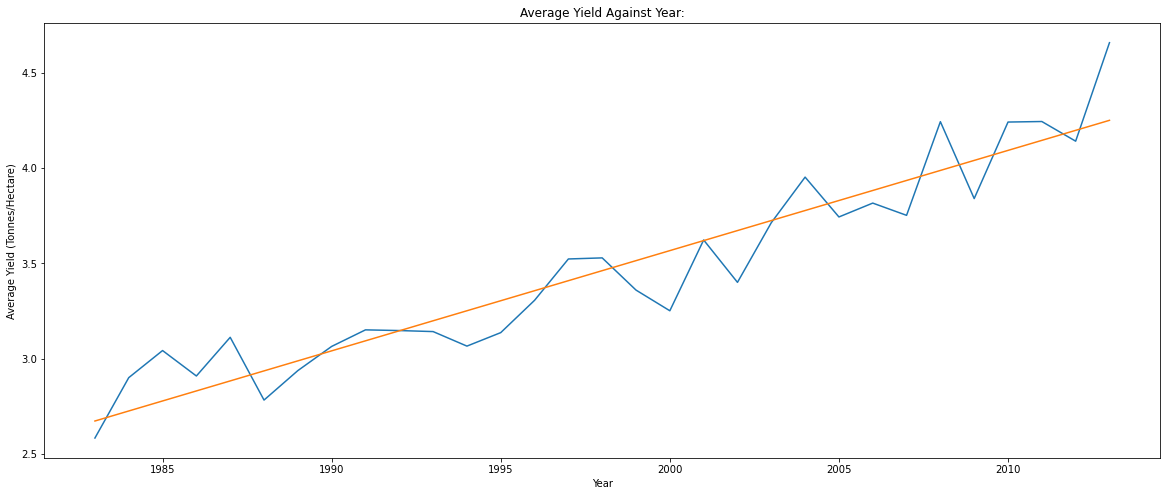

In [4]:
#getting a dataframe of years
year_df = df_duplicate['year'].to_numpy()
individual_years = np.unique(year_df)
years_mean_dict = {}

#going through each year and getting the average yield
for year in individual_years:
    yields = df_duplicate.loc[df_duplicate['year'] == year, 'yield']
    years_mean_dict[year] = yields.mean()

#sorting all of the values recorded for each year
sorted_dict = dict(sorted(years_mean_dict.items(), key=lambda item: item[0]))

x_values = []
y_values = []

#finding the year and yield and storing them in 2 different lists
for key, value in sorted_dict.items():
    x_values.append(key)
    y_values.append(value)
    
x_bestfit = np.array(x_values)
y_bestfit = np.array(y_values)
m, b = np.polyfit(x_bestfit, y_bestfit, 1)

#plotting yield against year
plt.figure(figsize=[20,8])
plt.plot(x_values, y_values)
plt.plot(x_bestfit, m*x_bestfit + b)
plt.title('Average Yield Against Year:')
plt.xlabel('Year')
plt.ylabel('Average Yield (Tonnes/Hectare)')

plt.savefig('Average Yield Against Year.png', transparent=False)
plt.show()

From the graph above, the conclusion that can be made is that there has been a steady increase in the average yield as time went on and that there is a positive correlation between the average yield and the year.

#### Visualisation of Average Yield Against Rainfall:

Comparison of the yield against rainfall for 1983 and 2013 to allow for a comparison of the relationship over the course of 30 years.

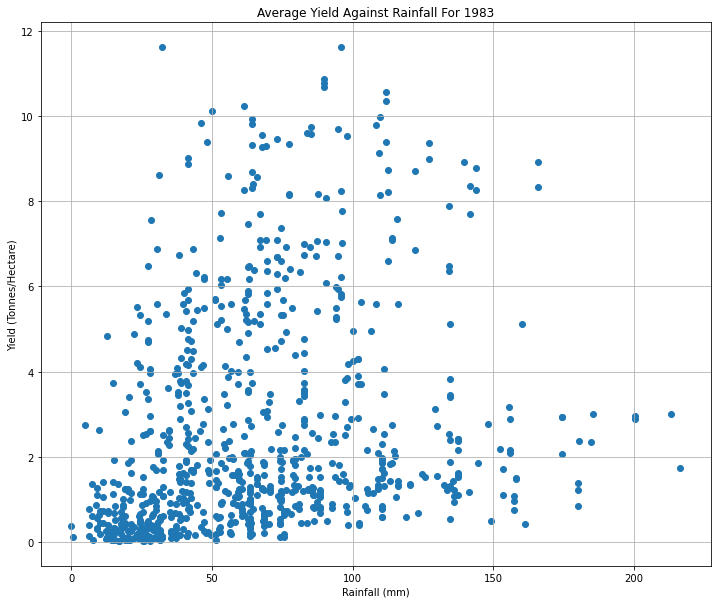

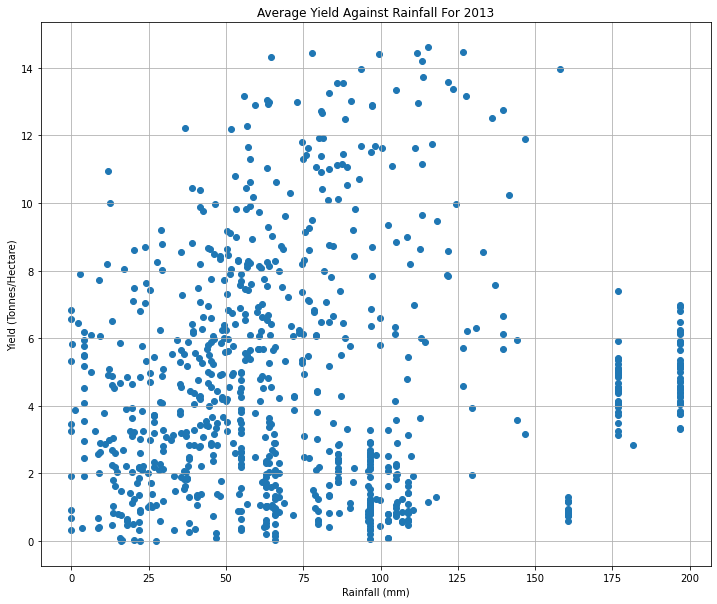

In [5]:
#getting a dataframe for the year 1983 and getting the average yields for that year
df_1983 = df_duplicate.loc[df_duplicate['year'] == 1983]
df_1983_data = df_1983[df_1983.columns[df_1983.columns.to_series().str.contains('rain')]]
average = df_1983_data.mean(axis=1)
yields = df_1983['yield']

#plotting a graph for the 1983 data
plt.figure(figsize=[12,10])
plt.grid(True)
plt.title('Average Yield Against Rainfall For 1983')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.scatter(average, yields)
plt.show()


#getting a dataframe for the year 2013 and getting the average yields for that year
df_2013 = df_duplicate.loc[df_duplicate['year'] == 2013]
df_2013_data = df_2013[df_2013.columns[df_2013.columns.to_series().str.contains('rain')]]
average = df_2013_data.mean(axis=1)
yields = df_2013['yield']

#plotting a graph for the 1983 data
plt.figure(figsize=[12,10])
plt.grid(True)
plt.title('Average Yield Against Rainfall For 2013')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.scatter(average, yields)
plt.show()

The 2 scatter plots above have been plotted to show if there is any noticeable difference between the average yield against rainfall for the years 1983 and 2013.

## <u>Data Preparation:</u>

### Normalising The Data Set:

In [6]:
#creating a dataframe of normalized data
normalize_df = df_duplicate.to_numpy()

#going through each data point and normalizing it (excluding the year)
for i in range(1, len(normalize_df[0])):
    normalize_df[:,i] = (normalize_df[:,i] - np.mean(normalize_df[:,i])) / np.std(normalize_df[:,i])


df = pd.DataFrame(normalize_df)
df.columns = df_duplicate.columns.values

df

,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature,yield
0,1983.0,-0.771169,-1.295743,-1.195355,-0.846516,-1.347193,-1.390759,-0.948747,-1.038500,-1.014004,...,-0.898424,-0.850879,-0.976457,-0.901654,-1.142649,-1.100511,-0.766340,-1.171049,-1.101286,-0.028584
1,1983.0,-0.805892,1.109767,0.959782,0.683577,1.045669,0.798046,-0.902171,1.042969,0.764471,...,-0.855935,0.553247,0.228969,-0.916505,0.957683,0.631399,-0.389075,1.003923,0.775201,-0.863860
2,1983.0,-0.805892,0.933004,1.078686,-0.444849,1.184504,1.317288,-0.806281,1.329048,1.419184,...,0.720261,1.241545,1.046936,1.729694,1.268077,1.155921,-0.738881,1.144510,1.035386,-0.823333
3,1983.0,2.499690,1.063655,0.878036,0.847467,1.013002,0.829999,1.774532,1.121888,0.803558,...,0.677772,1.131417,1.262190,4.073470,1.143920,1.096541,1.438750,1.070081,0.917120,-0.700560
4,1983.0,0.721898,0.933004,1.160433,-0.713522,0.800666,1.253382,-0.176146,0.530001,1.008767,...,-0.595520,0.250397,0.917783,-0.349462,0.709368,1.066851,0.470516,0.797176,0.901351,-0.758073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26493,2013.0,0.478841,0.810039,0.930056,2.361439,0.849666,0.829999,1.673163,0.628648,0.490859,...,0.527005,0.332992,0.300720,1.500177,0.699022,0.740262,1.934208,0.912954,0.932889,0.007474
26494,2013.0,-0.614918,-0.365817,-0.749464,-0.773974,-0.130345,-0.160555,-0.381625,-0.012562,-0.114995,...,0.085671,-0.327773,-0.890355,-0.627583,-0.087310,-0.645266,-0.306698,-0.459842,-0.801679,0.862716
26495,2013.0,-0.581353,-0.942218,-0.630560,0.015925,-1.012356,-0.767669,-0.918610,-1.008905,-0.427694,...,-0.849082,-1.112432,-0.445496,-0.740992,-1.184035,-0.843199,-0.757983,-1.220669,-0.825332,-0.137053
26496,2013.0,-0.131118,0.802354,1.004371,1.550047,0.735332,0.782069,0.048510,0.352435,0.481088,...,0.119936,0.043907,0.616427,0.811625,0.554171,0.670986,-0.268494,0.954304,1.232496,0.878212


### PCA Reduction:

In [7]:
#use sklearn PCA
from sklearn.decomposition import PCA

#create a new dataframe and fit it
PCA_df = df.copy().to_numpy()
PCA_df2 = PCA_df[:,:-1]
pca = PCA().fit(PCA_df2.data)

print('The number of features we have before PCA reduction is: ' + str(len(np.cumsum(pca.explained_variance_ratio_))) + '.')

The number of features we have before PCA reduction is: 37.


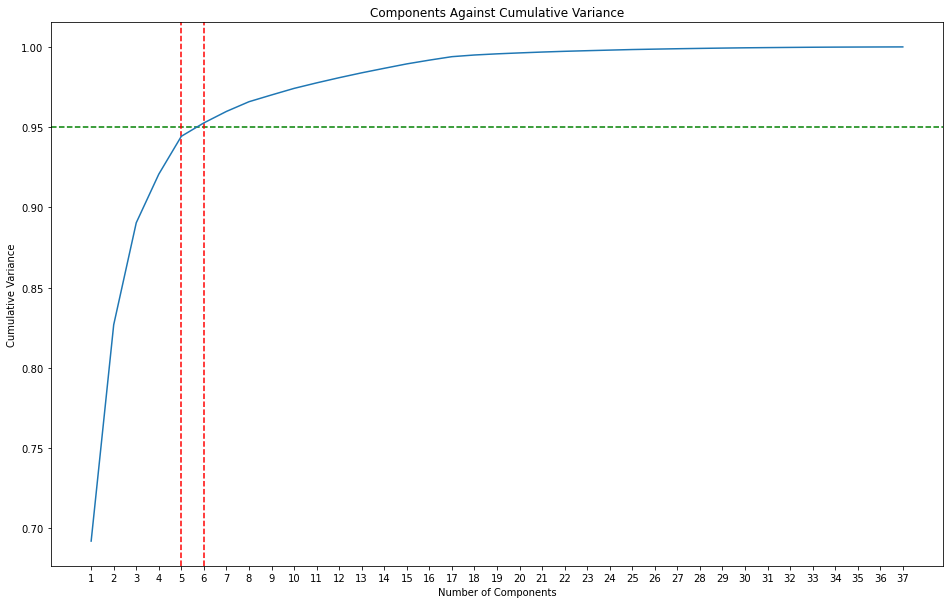

In [8]:
#plotting the variance against the number of components chosen
plt.figure(figsize=[16,10])
plt.title("Components Against Cumulative Variance")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.xticks(np.arange(PCA_df2.shape[1]), np.arange(1, PCA_df2.shape[1]+1))

#checking for the minimum number of components that contains 95% of the original data
plt.axhline(y = 0.95, color = 'g', linestyle = '--')
plt.axvline(x=5, color='r', linestyle = '--')
plt.axvline(x=4, color='r', linestyle = '--')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [9]:
#going through the number of components and manually checking the variance
for i in range(20):
    pca = PCA(n_components = i)
    x_reduced = pca.fit_transform(PCA_df2.data)
    
    #once i has been found stop
    if np.sum(pca.explained_variance_ratio_) > 0.95:
        break

#print the component and it's associated variance
print('The number of components is: ' + str(i) + '.')
print('The variance with this number of components is: ' + str(np.sum(pca.explained_variance_ratio_)) + '.')

#creating a new dataframe with the reduced data
X_reduced_df = pd.DataFrame(x_reduced)
Y_df = pd.DataFrame(PCA_df[:,-1])
Y_df = Y_df.rename(columns = {0: 'yield'})

final_df = pd.concat([X_reduced_df, Y_df], axis = 1)

The number of components is: 6.
The variance with this number of components is: 0.9526520298596158.


### Doing Splits:

Creating the training, validation and testing sets with a 60/20/20 split respectively.

In [10]:
#setting percentages for the train, validation and test splits
split_ratios = np.array([0.6, 0.2, 0.2])

# shuffle the input
df = final_df.sample(frac = 1, random_state = 10)

# split into 3 different splits
train_split, val_split, test_split = np.array_split(df, (split_ratios[:-1].cumsum() * len(df)).astype(int))

#printing out the values for each
print('The training set size is: ', (len(train_split)))
print('The validation set size is: ', (len(val_split)))
print('The test set size is: ', (len(test_split)))

The training set size is:  15898
The validation set size is:  5300
The test set size is:  5300


In [11]:
#setting training, validation and test variables for X and Y
X_train = train_split.drop('yield', axis = 1).to_numpy()
X_val = val_split.drop('yield', axis = 1).to_numpy()
X_test = test_split.drop('yield', axis = 1).to_numpy()

Y_train = train_split['yield'].to_numpy()
Y_val = val_split['yield'].to_numpy()
Y_test = test_split['yield'].to_numpy()

## <u> First Model: Linear Regression:</u>

Implementing the linear regressions algorithm.

In [12]:
#doing a linear regression
beta_hat = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)
#creating a function to calculate the mean squared error of the 2 input variables
def lin_reg(X_var, Y_var):
    
    y_hat = np.round(X_var.dot(beta_hat), 3)
    mean_squared_error = np.square(np.subtract(Y_var, y_hat)).mean()
    return mean_squared_error

#running and printing the results
start_time = time.time()
print('The MSE value running a LE on the training data is: ' + str(round(lin_reg(X_train, Y_train), 5)))
print('The MSE value running a LE on the test data is: ' + str(round(lin_reg(X_test, Y_test), 5)))
end_time = time.time()

LR_running_time = end_time - start_time
LR_running_time = round(LR_running_time, 8)
print('The running time for the LR was ' + str(LR_running_time) + ' seconds.')

The MSE value running a LE on the training data is: 0.62707
The MSE value running a LE on the test data is: 0.63131
The running time for the LR was 0.00200152 seconds.


## <u> Second Model: Regression Forest:</u>

Implementing the regression forest algorithm.

In [13]:
def find_split(x, y, subspace):
    
    """Given a dataset and its target values, this finds the optimal combination
    of feature and split point that gives the lowest variance of the target variable.
    
    Uses random subspace method, randomly selects attributes for each feature"""
    
    start_variance = np.var(y)
    best = {'variance' : start_variance}
    
    indices = list(range(x.shape[1]))
    random.seed(1234)
    
    if subspace and subspace <= len(indices):
        indices = random.sample(indices, subspace)
    
    for i in indices:
        
        length = len(np.unique(x[:,i]))
        maximum = max(np.unique(x[:,i]))
        minimum = min(np.unique(x[:,i]))
        bins = 10
        
        split_number = (length % bins > 0) + int(length / bins)
        splits = np.linspace(minimum, maximum, split_number)
        
        for split in splits:
                       
            lhs = y[x[:,i] <= split]
            rhs = y[x[:,i] > split]
            
            len_lhs = len(lhs)
            len_rhs = len(rhs)
            
            total = len_lhs + len_rhs
            
            fraction_lhs = len_lhs / total
            fraction_rhs = len_rhs / total
                  
            variance_lhs = np.var(lhs)
            variance_rhs = np.var(rhs)
            
            variance = fraction_rhs*variance_rhs + fraction_lhs*variance_lhs        
                
            left_array = np.where(x[:,i] <= split)
            right_array = np.where(x[:,i] > split)
            
            left_indices = np.array(left_array)[0].tolist()
            right_indices = np.array(right_array)[0].tolist()
            
            if variance < best['variance']:
                best = {'feature' : i,
                        'split' : split,
                        'variance' : variance, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices}
    
    return best

In [14]:
def build_tree(x, y, subspace, max_depth = 3):
    
    # Check if either of the stopping conditions have been reached. If so generate a leaf node...
    if max_depth==1 or (y==y[0]).all():
        # Generate a leaf node...
        average = np.mean(y)
        average = average.round(3)
        
        return {'leaf': True, 'predict': average}
    
    else:
        move = find_split(x, y, subspace)
        
        if (len(move) == 1):
            return {'leaf' : True, 'predict' : np.mean(y)} 
        
        left = build_tree(x[move['left_indices'],:], y[move['left_indices']], max_depth - 1, subspace)
        right = build_tree(x[move['right_indices'],:], y[move['right_indices']], max_depth - 1, subspace)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'variance' : move['variance'],
                'left' : left,
                'right' : right}

In [15]:
def predict(tree, samples):
    
    """Predicts every entry of a data matrix."""
    ret = np.empty(samples.shape[0], dtype=float)
    ret.fill(-1)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['predict']
        
        else:
            going_left = samples[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret

In [16]:
def bootstrap(x, y, n):
    
    np.random.seed(1234)
    indices = np.random.randint(0, len(x), n)
    y = y[indices]
    x = x[indices]
    
    return x, y

In [17]:
def random_forest(x, y, tree_no, boostrap, features, depth):
    
    forest_list = []
    
    for i in range(tree_no):
        
        x, y = bootstrap(x, y, boostrap)
        tree = build_tree(x, y, features, depth)
        forest_list.append(tree)
        
    return forest_list

In [18]:
def predicting_forest(forest, input_data):
    
    predictions = []
    
    for tree in forest:
        predictions.append(predict(tree,input_data))
        
    return np.mean(predictions, axis = 0)

In [19]:
def optimizing_parameters():
    
    best_MSE = 1000
    best_depth = None
    best_bootstrap = None
    best_tree_number = None
    best_feature_number = None
    
    for i in range(5,10):
        for j in range(2000, 5000, 500):
            for k in range(5, 10):
                forest = random_forest(X_val, Y_val, tree_no = i, boostrap = j, features = k, depth = 3)
                val_predicting = predicting_forest(forest, X_val)
                val_MSE = np.square(np.subtract(Y_val, val_predicting)).mean()
                if val_MSE < best_MSE:
                    best_MSE = val_MSE
                    best_tree_number = i
                    best_bootstrap = j
                    best_feature_number = k
    
    return best_MSE, best_bootstrap, best_tree_number, best_feature_number

optimal_MSE, optimal_bootstrap, optimal_tree_no, optimal_feature_no = optimizing_parameters()

print('The best MSE is: ' + str(optimal_MSE))
print('The best bootstrap value is: ' + str(optimal_bootstrap))
print('The best tree number is: ' + str(optimal_tree_no))
print('The best feature number is: ' + str(optimal_feature_no))

D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The best MSE is: 0.5151298059629393
The best bootstrap value is: 2500
The best tree number is: 9
The best feature number is: 7


In [79]:
def optimizing_parameters():
    
    best_MSE = 1000
    best_depth = None
    best_bootstrap = None
    best_tree_number = None
    best_feature_number = None
    
    for h in range(5, 25, 5):
        print(h)
        for i in range(5,25, 5):
            for j in range(2000, 5000, 500):
                for k in range(5, 10):
                    forest = random_forest(X_val, Y_val, tree_no = i, boostrap = j, features = k, depth = h)
                    val_predicting = predicting_forest(forest, X_val)
                    val_MSE = np.square(np.subtract(Y_val, val_predicting)).mean()
                    if val_MSE < best_MSE:
                        best_MSE = val_MSE
                        best_depth = h
                        best_tree_number = i
                        best_bootstrap = j
                        best_feature_number = k
    
    return best_MSE, best_depth, best_bootstrap, best_tree_number, best_feature_number

optimal_MSE, optimal_depth, optimal_bootstrap, optimal_tree_no, optimal_feature_no = optimizing_parameters()

print('The best MSE is: ' + str(optimal_MSE))
print('The best depth is: ' + str(optimal_depth))
print('The best bootstrap value is: ' + str(optimal_bootstrap))
print('The best tree number is: ' + str(optimal_tree_no))
print('The best feature number is: ' + str(optimal_feature_no))

5


D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10
15
20
The best MSE is: 0.2916496671105226
The best depth is: 15
The best bootstrap value is: 4500
The best tree number is: 5
The best feature number is: 9


In [86]:
def evaluating_tree(X_train, Y_train, X_test, Y_test, tree_no = 5, bootstrap_no = 4500, features = 9, depth = 15):
    
    creating_forest = random_forest(X_train, Y_train, tree_no, bootstrap_no, features, depth)
    
    train_predict = predicting_forest(creating_forest, X_train)
    MSE_train = np.square(np.subtract(Y_train, train_predict)).mean()
    
    test_predict = predicting_forest(creating_forest, X_test)
    MSE_test = np.square(np.subtract(Y_test, test_predict)).mean()
    
    return MSE_train, MSE_test, train_predict, test_predict

In [87]:
start_time = time.time()
MSE_train, MSE_test, train_predict, test_predict = evaluating_tree(X_train, Y_train, X_test, Y_test)
end_time = time.time()

RF_running_time = end_time - start_time
RF_running_time = round(RF_running_time, 8)

RF_MSE_train = round(MSE_train, 3)
RF_MSE_test = round(MSE_test, 3)

print('The MSE value running a RF on the training data is: ' + str(RF_MSE_train))
print('The MSE value running a RF on the test data is: ' + str(RF_MSE_test))
print('The running time for the RF was ' + str(RF_running_time) + ' seconds.')

D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
D:\Documents\Programming\Anaconda\envs\ML\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The MSE value running a RF on the training data is: 0.38
The MSE value running a RF on the test data is: 0.432
The running time for the RF was 8.95940566 seconds.


## <u> Third Model: Gaussian Process:</u>

Implementing the Gaussian Process algorithm.

In [22]:
#setting training, validation and test variables for X and Y
X_train2 = train_split.drop('yield', axis = 1).to_numpy()
X_val2 = val_split.drop('yield', axis = 1).to_numpy()
X_test2 = test_split.drop('yield', axis = 1).to_numpy()

Y_train2 = train_split['yield'].to_numpy()
Y_val2 = val_split['yield'].to_numpy()
Y_test2 = test_split['yield'].to_numpy()

In [23]:
def kernel(X, Y, l=1.0, sigma_f=1.0):
    
    sqdist = np.sum(X**2, 1).reshape(-1, 1) + np.sum(Y**2, 1) - 2 * np.dot(X, Y.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [24]:
def posterior_function(X, Y, X_test, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    
    length = len(X)
    kern = kernel(X, X, 1)

    L = np.linalg.cholesky(kern + sigma_y*np.eye(length))
    Lk = np.linalg.solve(L, kernel(X, X_test, l))
    
    return np.dot(Lk.T, np.linalg.solve(L, Y))

In [25]:
def evaluate_Gaussian(X, Y, X2, Y2, l=1, sigma_f=1, sigma_y=1):
    
    Y_prediction = posterior_function(X, Y, X2)
    return np.square(np.subtract(Y2, Y_prediction)).mean()

In [26]:
start_time = time.time()
predicting_test = posterior_function(X_train[0:10000], Y_train[0:10000], X_test, l=1, sigma_f=1, sigma_y=1e-6)
end_time = time.time()

Gaussian_running_time = end_time - start_time
Gaussian_running_time = round(Gaussian_running_time, 8)

Gaussian_MSE = np.square(np.subtract(Y_test, predicting_test)).mean()
Gaussian_MSE = round(Gaussian_MSE, 3)

print('The MSE value running a GP on the test data is: ' + str(Gaussian_MSE))
print('The running time for GP was ' + str(Gaussian_running_time) + '.')

The MSE value running a GP on the test data is: 2.189
The running time for GP was 16.06510425.


## <u> Fourth Model: Neural Network:</u>

Implementing a Neural Network.

In [27]:
#import modules needed to implement a neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
#function to plot the error of the training and validation set of the NN
def plot_NN_result(data):
    
    val_df = pd.DataFrame(data.history)
    val_df['epoch'] = data.epoch
    plt.figure(figsize=[16,10])
    plt.plot(val_df['epoch'], val_df['loss'], label = 'Error For Training Data')
    plt.plot(val_df['epoch'], val_df['val_mse'], label = 'Error For Validation Data')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title('')
    plt.ylim([0.25, 0.5])
    plt.legend()

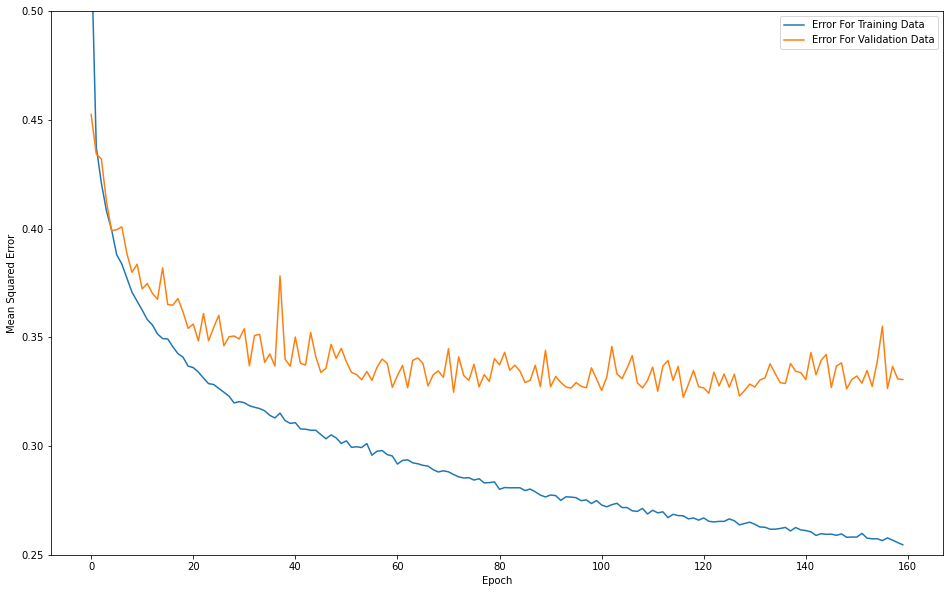

In [29]:
# creating a neural network with 2 layers
model = Sequential()
#first layer
model.add(Dense(64, input_dim = X_train.shape[1], activation = tf.nn.relu))
#second layer
model.add(Dense(64, activation = tf.nn.relu))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

#conditions to stop the NN early
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-6, patience = 100, verbose = 1, mode = 'auto', restore_best_weights = True)
#training the model
unoptimized_values = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks = [monitor], verbose = 0, epochs = 160)
#plotting the error for training against validation data
plot_NN_result(unoptimized_values)

Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping


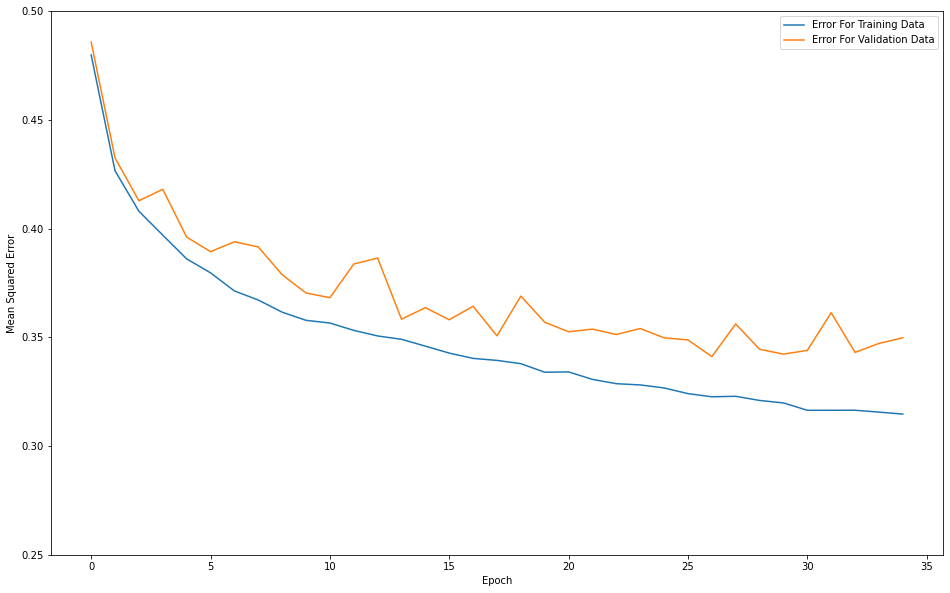

In [30]:
#recreating the neural network which will be optimized
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = tf.nn.relu))
model.add(Dense(64, activation = tf.nn.relu))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-6, patience = 8, verbose = 1, mode = 'auto', restore_best_weights = True)
optimized_values = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks = [monitor], verbose = 0, epochs = 160)
plot_NN_result(optimized_values)

In [31]:
start_time = time.time()
loss, NN_MSE = model.evaluate(X_test, Y_test)
end_time = time.time()

NN_running_time = end_time - start_time
NN_running_time = round(NN_running_time, 8)

loss_val = round(loss, 5)
print('The MSE for value running a NN on the test set is: ' + str(loss_val) + '.')
print('The running time for the NN was ' + str(NN_running_time) + ' seconds.')

166/166 [==============================] - 0s 319us/step - loss: 0.3388 - mse: 0.3388
The MSE for value running a NN on the test set is: 0.33881.
The running time for the NN was 0.0890193 seconds.


## Using A Toy Problem for Validation:

In [32]:
np.random.seed(1234)
